## Load Data

In [1]:
!ls

LICENSE
Mod4_Project_Tino.ipynb
Mod4_Project_Tino_MaryJo.ipynb
README.md
column_names.md
kc_clean_with_employers.csv
kc_housing_data_for_feat_engineering_lab.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_columns', 300)

In [3]:
#dict for Storing the models to test them
models_dict = {}

In [4]:
df_orig = pd.read_csv("kc_housing_data_for_feat_engineering_lab.csv")

In [5]:
df_orig.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_old,year_sold,since_sold,price_log
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,62,2014,3,12.309982
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,66,2014,3,13.195614
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,84,2015,2,12.100712
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,52,2014,3,13.311329
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,30,2015,2,13.142166


## Feature Engineering

In [6]:
df = df_orig.copy()

### Distance to biggest Employers
We assume Hoosing prices are effected by the distance to the biggest employers in the area. The three biggest Employers are:
* Boing
* Microsoft
* Amazon <br>
therefore three Columns are created estimating the distance with log lang data

In [7]:
#Lat and Long Data of the Employers
employers_dict = { "boeing": {"lat":47.6213723 , "long":-122.2890233 },
                  "microsoft":{"lat":47.6423318 , "long":-122.1456849},
                  "amazon":{"lat":47.6222917 , "long":-122.3386826 }}
                     

In [8]:
# Distance estimation using geometric distance
def get_distance(lat,long,t_lat,t_long):
    dx = lat-t_lat
    dy = long-t_long
    return (dx**2+dy**2)**0.5


def get_emp_distance(lat,long,employer):
    t_lat = employers_dict[employer]["lat"]
    t_long = employers_dict[employer]["long"]
    d = get_distance(lat,long,t_lat,t_long)
    return d

In [9]:
# Create Distance Features for Boing, Amazon , Microsoft
#for emp in employers_dict.keys():
#    print(emp)
#    df[emp] = [get_emp_distance(df.iloc[i]["lat"],df.iloc[i]["long"],emp) for i in range(len(df))]

In [10]:
#df.to_csv("kc_clean_with_employers.csv", index = False)

In [11]:
df = pd.read_csv("kc_clean_with_employers.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_old,year_sold,since_sold,price_log,boeing,microsoft,amazon
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,62,2014,3,12.309982,0.114732,0.172008,0.137889
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,66,2014,3,13.195614,0.104040,0.190333,0.100652
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,84,2015,2,12.100712,0.129295,0.129450,0.156634
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,52,2014,3,13.311329,0.144658,0.275563,0.115113
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,30,2015,2,13.142166,0.244066,0.103872,0.293734


## Transformation

In [12]:
#make zipcode categorical
df["zipcode"] = df.zipcode.astype("str")

In [13]:
#make yr_renovated binary since there are 95% data missing
df["yr_renovated"] = df["yr_renovated"].apply(lambda x: 1 if x>0 else 0)
df = df.rename(columns = {"yr_renovated":"renovated"})

In [14]:
df["sqft_basement"] = df["sqft_living"]-df["sqft_above"]
df["sqft_basement"] = df["sqft_basement"].apply(lambda x: 0.1 if x == 0 else x)

In [15]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_old,year_sold,since_sold,price_log,boeing,microsoft,amazon
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0.1,1955,0,98178,47.5112,-122.257,1340,5650,62,2014,3,12.309982,0.114732,0.172008,0.137889
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400.0,1951,1,98125,47.7210,-122.319,1690,7639,66,2014,3,13.195614,0.104040,0.190333,0.100652
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0.1,1933,0,98028,47.7379,-122.233,2720,8062,84,2015,2,12.100712,0.129295,0.129450,0.156634
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000,52,2014,3,13.311329,0.144658,0.275563,0.115113
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0.1,1987,0,98074,47.6168,-122.045,1800,7503,30,2015,2,13.142166,0.244066,0.103872,0.293734


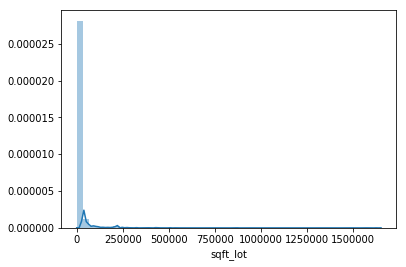

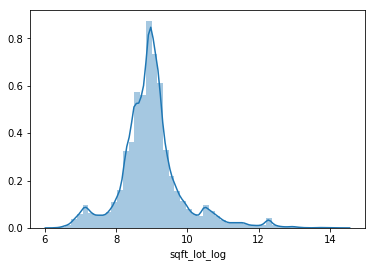

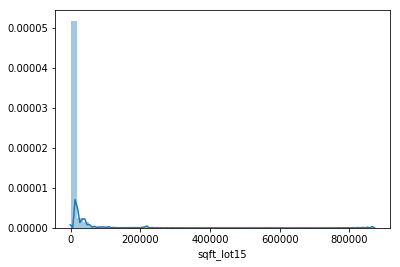

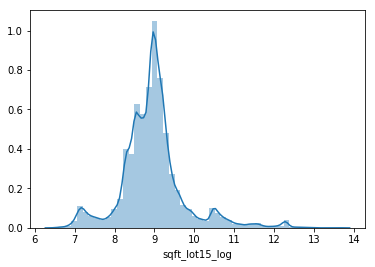

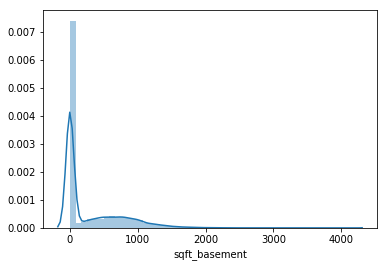

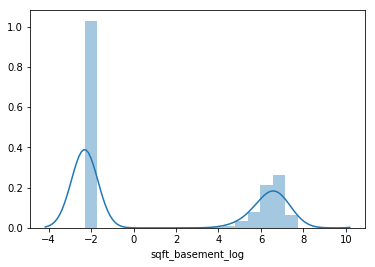

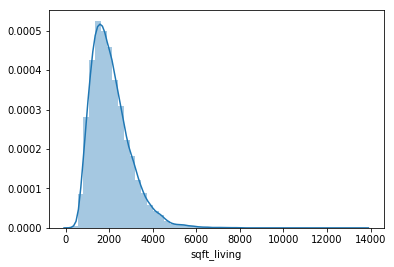

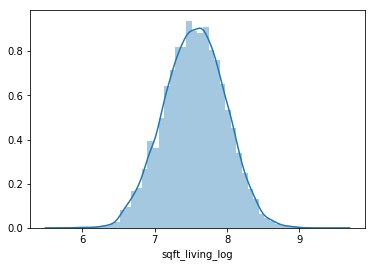

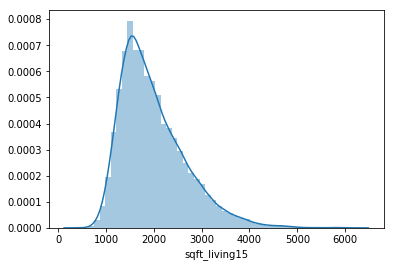

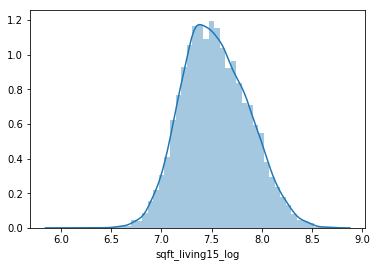

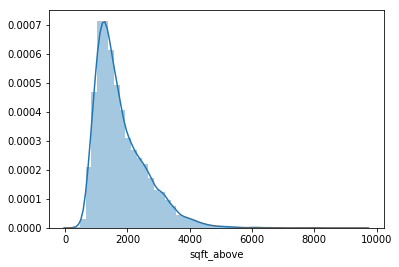

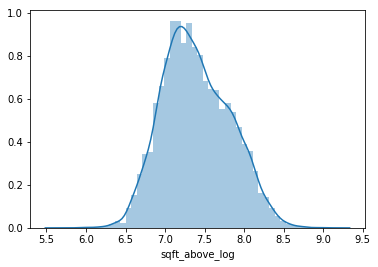

In [16]:
# log transform
import seaborn as sns
logcols = ['sqft_lot','sqft_lot15', 'sqft_basement','sqft_living','sqft_living15', 'sqft_above']
for col in logcols:
    sns.distplot(df[col])
    plt.show()
    df[col+"_log"] = np.log(df[col])
    sns.distplot(df[col+"_log"])
    plt.show()
    df.drop(col, axis = 1 , inplace = True)

## Train Test Split

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
X = df.drop(["price", "price_log", "id" ,"date","year_sold"], axis = 1)
y = df.price_log

X_engineered_before_split = X.copy()

In [19]:
# Train-Test-Split
X_train, X_test ,y_train, y_test = train_test_split(X,y, random_state = 34)

In [20]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(data = scaler.transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(data = scaler.transform(X_test), columns = X_test.columns)

/Users/pietrassyk/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/pietrassyk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/pietrassyk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


## Basemodel

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
import statsmodels.api as sm

In [22]:
#start with all features in Trainingset
features = list(X_train.columns)
len(features)

23

In [23]:
X_train = X_train[features]
X_test = X_test[features]
basemodel = LinearRegression().fit(X_train,y_train)
base_y_hat = basemodel.predict(X_train)
base_r2 =  r2_score(base_y_hat , y_train)
print(f"base_model r^2 Train: {base_r2}")
print(f"base_model r^2 Test: {r2_score(basemodel.predict(X_test),y_test)}")
RMSE = np.sqrt(metrics.mean_squared_error(y_test, basemodel.predict(X_test)))
print(f"Model prediciton is {round(RMSE/y_train.std(),3)} STDs off")

base_model r^2 Train: 0.7765464953794265
base_model r^2 Test: 0.7597233911527819
Model prediciton is 0.433 STDs off


In [24]:
def plot_coefs(model, X_train ,name= "LinearModel", figsize = (16,8) , legend = False, return_df = False):
    lm = model
    coef = pd.DataFrame(data=lm.coef_ ).T
    coef.columns = X_train.columns
    model_coef = coef.T.sort_values(by=0).T
    model_coef.plot(kind='bar', title=f'Modal Coefficients for {name}', legend=legend, figsize=figsize)
    if return_df:
        return model_coef

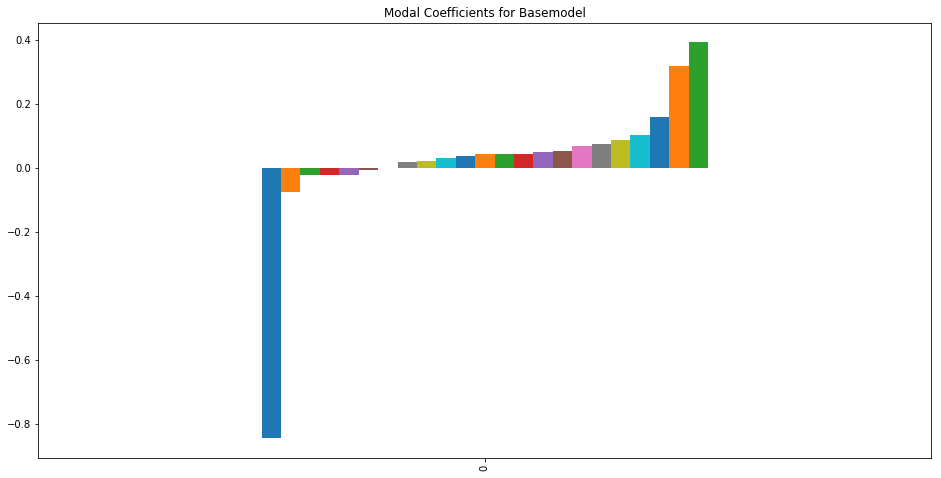

In [25]:
plot_coefs(basemodel,X_train,name = "Basemodel", legend = False)

In [26]:
#store model for later
models_dict["basemodel"] = {
    "features" : features,
    "scaler" : scaler,
    "model" : basemodel,
    "poly": 1
}

## Add Polynomials and Interactionterms

In [27]:
from sklearn.preprocessing import PolynomialFeatures

In [28]:
X_train = X_train
X_test = X_test

In [29]:
columns = list(X_train.columns)
poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly_2.fit(X_train)
X_train_2= pd.DataFrame(poly_2.transform(X_train), columns=poly_2.get_feature_names(columns))
X_test_2= pd.DataFrame(poly_2.transform(X_test), columns=poly_2.get_feature_names(columns))
columns_2  = poly_2.get_feature_names(columns)

In [30]:
scaler_2 = StandardScaler()

scaler_2.fit(X_train_2)
X_train_2 = pd.DataFrame(X_train_2, columns = columns_2)
X_test_2 = pd.DataFrame(X_test_2, columns = columns_2)

In [31]:
#Make polynomial Modeltesting possible and store Raw DataFrame
poly_2.fit(X_engineered_before_split)
X_engineered_before_split = pd.DataFrame(poly_2.transform(X_engineered_before_split), columns=poly_2.get_feature_names(X_engineered_before_split.columns))
X_engineered_before_split.shape

(21600, 299)

## Feature Selection

### Selection by p_value

In [32]:
X_train = X_train_2
X_test = X_test_2

In [33]:
#running a model in Statsmodels to easily get p_values
poly_2_model = sm.OLS(list(y_train),sm.add_constant(X_train)).fit()
poly_2_model.summary()

/Users/pietrassyk/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     534.3
Date:                Sun, 16 Jun 2019   Prob (F-statistic):               0.00
Time:                        23:16:26   Log-Likelihood:                 6085.4
No. Observations:               16200   AIC:                        -1.163e+04
Df Residuals:                   15930   BIC:                            -9554.
Df Model:                         269                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                5.988e+09   9.82e+09      0.610      0.542   -1.33e+10    2.52e+10
bedrooms                               -0.0086      0.002     -4.113      0.000      -0.013      -0.004
bathrooms                               0.0215      0.003      7.715      0.000       0.016       0.027
floors                                 -0.0109      0.003     -3.760      0.000      -0.017      -0.005
waterfront                          -6.017e+08   8.99e+08     -0.669      0.503   -2.36e+09    1.16e+09
view                                    0.0282      0.005      6.068      0.000       0.019       0.037
condition                               0.0419      0.003     16.572      0.000       0.037       0.047
grade                                   0.0958      0.003     33.834      0.000       0.090       0.101
yr_built                             1.126e+07   1.03e+07      1.097      0.273   -8.86e+06    3.14e+07
renovated                           -1.399e+09   2.17e+09     -0.644      0.520   -5.66e+09    2.86e+09
zipcode                                -0.0293      0.004     -8.299      0.000      -0.036      -0.022
lat                                  8.425e+09   1.26e+10      0.670      0.503   -1.62e+10    3.31e+10
long                                 2.657e+10   2.41e+10      1.104      0.269   -2.06e+10    7.37e+10
yr_old                               1.126e+07   1.03e+07      1.097      0.273   -8.86e+06    3.14e+07
since_sold                           3.014e+09   4.88e+09      0.617      0.537   -6.56e+09    1.26e+10
boeing                              -7.047e+09   1.16e+10     -0.609      0.542   -2.97e+10    1.56e+10
microsoft                            2.708e+10   2.36e+10      1.149      0.250   -1.91e+10    7.33e+10
amazon                              -1.446e+10   1.55e+10     -0.936      0.349   -4.48e+10    1.58e+10
sqft_lot_log                            0.0718      0.005     14.844      0.000       0.062       0.081
sqft_lot15_log                      -9.118e-05      0.005     -0.020      0.984      -0.009       0.009
sqft_basement_log                      -0.6515      0.816     -0.799      0.424      -2.250       0.947
sqft_living_log                         2.4198      2.963      0.817      0.414      -3.387       8.227
sqft_living15_log                       0.0432      0.003     15.956      0.000       0.038       0.048
sqft_above_log                         -2.1870      2.883     -0.759      0.448      -7.838       3.464
bedrooms^2                             -0.0008      0.001     -0.590      0.555      -0.003       0.002
bedrooms bathrooms                      0.0037      0.003      1.339      0.181      -0.002       0.009
bedrooms floors                         0.0141      0.003      4.84

In [34]:
poly_2_model_sk = LinearRegression().fit(X_train,y_train)

In [35]:
poly_2_model_sk

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
models_dict["poly_2_model"] = {
    "features" : list(X_train_2.columns),
    "scaler" : scaler_2,
    "model" : poly_2_model_sk,
    "poly": 2
}

In [37]:
def ols_select_features (model,alpha = 0.05, get_df = False, verbose = True):
    """Get Features of a Statsmodels linear Model, that do not yield significant p values
    ------------
    Inputs
    model: sm.OLS Object
    alpha: [float] alpha threshold for p value comparison
    get_df : [bool] if True results table will be outputed as pandas Dataframe
    verbose: [bool] whether or not to print unsignificant features while running
    ------------
    Outputs:
    [list] of unsignificant Features"""
    value_table = pd.DataFrame(model.summary().tables[1])
    value_table = value_table.applymap(lambda x: x.data)
    value_table.columns=value_table.iloc[0]
    value_table = value_table.drop(0,axis = "index")
    value_table = value_table.set_index("")
    value_table = value_table.applymap(lambda x: float(x))
    if get_df:
        return value_table
    else:
        out = list(value_table.loc[value_table[value_table.columns[3]] > alpha].index)
        if verbose:
            print(f"The following Features have p_values higher then aplha: {alpha}")
            for item in out:
                print(item)
        return out

In [38]:
to_drop = ols_select_features(poly_2_model, get_df = False , verbose = False)

In [39]:
len(to_drop)

226

In [40]:
features =list(X_train.columns)
features = [x for x in features if x not in to_drop]
print(len(features))

74


In [41]:
poly_2_p_removed_model = sm.OLS(list(y_train),sm.add_constant(X_train[features])).fit()

/Users/pietrassyk/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [42]:
poly_2_p_removed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     1063.
Date:                Sun, 16 Jun 2019   Prob (F-statistic):               0.00
Time:                        23:16:50   Log-Likelihood:                 1761.5
No. Observations:               16200   AIC:                            -3373.
Df Residuals:                   16125   BIC:                            -2796.
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                12.7891      0.006   2302.892      0.000      12.778      12.800
bedrooms                              0.0218      0.002      9.539      0.000       0.017       0.026
bathrooms                             0.0642      0.003     22.355      0.000       0.059       0.070
floors                                0.0253      0.003      9.734      0.000       0.020       0.030
view                                  0.0521      0.002     25.396      0.000       0.048       0.056
condition                             0.0438      0.003     17.136      0.000       0.039       0.049
grade                                 0.1519      0.003     48.428      0.000       0.146       0.158
zipcode                               0.0155      0.003      5.122      0.000       0.010       0.021
sqft_lot_log                          0.0776      0.003     24.438      0.000       0.071       0.084
sqft_living15_log                     0.0927      0.003     31.285      0.000       0.087       0.099
bedrooms floors                       0.0277      0.003     10.255      0.000       0.022       0.033
bedrooms renovated                   -0.0055      0.002     -2.842      0.004      -0.009      -0.002
bedrooms long                        -0.0149      0.005     -2.783      0.005      -0.025      -0.004
bedrooms boeing                       0.0116      0.006      1.796      0.072      -0.001       0.024
bedrooms microsoft                   -0.0117      0.005     -2.468      0.014      -0.021      -0.002
bedrooms sqft_basement_log            0.0123      0.003      4.841      0.000       0.007       0.017
bedrooms sqft_living_log             -0.0242      0.003     -9.032      0.000      -0.029      -0.019
bathrooms floors                     -0.0293      0.003     -9.220      0.000      -0.035      -0.023
bathrooms sqft_basement_log          -0.0180      0.004     -4.298      0.000      -0.026      -0.010
bathrooms sqft_living_log             0.0192      0.009      2.109      0.035       0.001       0.037
bathrooms sqft_above_log              0.0089      0.009      0.966      0.334      -0.009       0.027
floors view                          -0.0021      0.002     -1.168      0.243      -0.006       0.001
floors condition                      0.0047      0.002      1.984      0.047    5.76e-05       0.009
floors grade                         -0.0038      0.003     -1.145      0.252      -0.010       0.003
waterfront grade                      0.0104      0.001      9.658      0.000       0.008       0.013
waterfront long                      -0.0141      0.002     -7.026      0.000      -0.018      -0.010
view zipcode                          0.0143      0.002      6.372      0.000       0.010       0.019
view lat               

In [43]:
poly_2_p_removed_model_sk = LinearRegression().fit(X_train[features],y_train)

In [44]:
models_dict["poly_2_p_removed_model"] = {
    "features" : features,
    "scaler" : scaler_2,
    "model" : poly_2_p_removed_model_sk,
    "poly": 2
}

### Selection by F-Test

In [45]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=10)

selector.fit(X_train, y_train)

SelectKBest(k=10, score_func=<function f_regression at 0x1a19ed4a60>)

In [46]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]

In [47]:
selected_columns

Index(['bathrooms', 'view', 'grade', 'lat', 'microsoft', 'sqft_living_log',
       'sqft_living15_log', 'sqft_above_log', 'zipcode microsoft', 'lat^2'],
      dtype='object')

In [48]:
poly_2_f10_model = sm.OLS(list(y_train),sm.add_constant(X_train[selected_columns])).fit()
poly_2_f10_model.summary()

/Users/pietrassyk/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     4844.
Date:                Sun, 16 Jun 2019   Prob (F-statistic):               0.00
Time:                        23:16:54   Log-Likelihood:                -1370.6
No. Observations:               16200   AIC:                             2763.
Df Residuals:                   16189   BIC:                             2848.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                13.1139      0.003   4115.959      0.000      13.108      13.120
bathrooms             0.0059      0.003      1.806      0.071      -0.001       0.012
view                  0.0832      0.002     37.418      0.000       0.079       0.088
grade                 0.1602      0.004     45.649      0.000       0.153       0.167
lat                   0.1694      0.003     60.116      0.000       0.164       0.175
microsoft            -0.0096      0.004     -2.696      0.007      -0.017      -0.003
sqft_living_log       0.1613      0.005     32.465      0.000       0.152       0.171
sqft_living15_log     0.0497      0.003     14.785      0.000       0.043       0.056
sqft_above_log       -0.0018      0.004     -0.390      0.696      -0.011       0.007
zipcode microsoft     0.0027      0.003      0.966      0.334      -0.003       0.008
lat^2                -0.0701      0.002    -29.785      0.000      -0.075      -0.065
==============================================================================
Omnibus:                      437.042   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              657.682
Skew:                           0.279   Prob(JB):                    1.54e-143
Kurtosis:                       3.814   Cond. No.                         6.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
poly_2_f10_model_sk = LinearRegression().fit(X_train[selected_columns],y_train)

In [50]:
models_dict["poly_2_f10_model"] = {
    "features" : selected_columns,
    "scaler" : scaler_2,
    "model" : poly_2_f10_model_sk,
    "poly": 2
}

### Recursive Feature Elimination

In [51]:
from sklearn.feature_selection import RFECV

In [52]:
ols = LinearRegression()
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=1, cv=5, scoring='neg_mean_squared_error')

# Fit recursive feature eliminator 
selector.fit(X_train, y_train)

RFECV(cv=5,
   estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
   min_features_to_select=1, n_jobs=None, scoring='neg_mean_squared_error',
   step=1, verbose=0)

In [53]:
selected_columns = X_train.columns[selector.support_]
removed_columns = X_train.columns[~selector.support_]

In [54]:
poly_2_RFE_model = sm.OLS(list(y_train),sm.add_constant(X_train[selected_columns])).fit()
poly_2_RFE_model.summary()

/Users/pietrassyk/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     757.1
Date:                Sun, 16 Jun 2019   Prob (F-statistic):               0.00
Time:                        23:18:18   Log-Likelihood:                 6055.8
No. Observations:               16200   AIC:                        -1.173e+04
Df Residuals:                   16009   BIC:                        -1.026e+04
Df Model:                         190                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                5.126e+09   9.83e+09      0.522      0.602   -1.41e+10    2.44e+10
bedrooms                               -0.0092      0.002     -4.525      0.000      -0.013      -0.005
bathrooms                               0.0213      0.003      7.832      0.000       0.016       0.027
floors                                 -0.0107      0.003     -3.820      0.000      -0.016      -0.005
waterfront                          -5.164e+08   8.94e+08     -0.578      0.563   -2.27e+09    1.24e+09
view                                    0.0346      0.002     14.715      0.000       0.030       0.039
condition                               0.0421      0.002     16.936      0.000       0.037       0.047
grade                                   0.0958      0.003     34.249      0.000       0.090       0.101
yr_built                            -9.858e+05   3.06e+06     -0.322      0.747   -6.99e+06    5.02e+06
renovated                           -1.187e+09   2.15e+09     -0.552      0.581    -5.4e+09    3.03e+09
zipcode                                -0.0289      0.003     -8.247      0.000      -0.036      -0.022
lat                                  7.293e+09   1.26e+10      0.581      0.561   -1.73e+10    3.19e+10
long                                 2.621e+10    2.4e+10      1.094      0.274   -2.08e+10    7.32e+10
yr_old                              -9.858e+05   3.06e+06     -0.322      0.747   -6.99e+06    5.02e+06
since_sold                           2.559e+09   4.86e+09      0.527      0.598   -6.96e+09    1.21e+10
boeing                              -7.535e+09   1.15e+10     -0.653      0.514   -3.01e+10    1.51e+10
microsoft                            2.562e+10   2.35e+10      1.091      0.275   -2.04e+10    7.16e+10
amazon                              -1.465e+10   1.54e+10     -0.951      0.342   -4.48e+10    1.55e+10
sqft_lot_log                            0.0712      0.003     22.966      0.000       0.065       0.077
sqft_basement_log                      -0.6881      0.806     -0.853      0.393      -2.269       0.892
sqft_living_log                         2.5622      2.929      0.875      0.382      -3.178       8.303
sqft_living15_log                       0.0432      0.003     16.414      0.000       0.038       0.048
sqft_above_log                         -2.3247      2.850     -0.816      0.415      -7.910       3.261
bedrooms floors                         0.0166      0.003      6.575      0.000       0.012       0.022
bedrooms yr_built                    1.074e+07   9.43e+06      1.138      0.255   -7.75e+06    2.92e+07
bedrooms renovated                     -0.0041      0.002     -2.574      0.010      -0.007      -0.001
bedrooms zipcode                       -0.0049      0.003     -1.93

In [55]:
poly_2_RFE_model_sk = LinearRegression().fit(X_train[selected_columns],y_train)

In [56]:
models_dict["poly_2_RFE_model"] = {
    "features" : selected_columns,
    "scaler" : scaler_2,
    "model" : poly_2_RFE_model_sk,
    "poly": 2
}

### Lasso

In [57]:
from sklearn.linear_model import Lasso

lasso_01 = Lasso(alpha=0.01, normalize=False)

lasso_01.fit(X_train,y_train)

y_train_hat = lasso_01.predict(X_train)
y_test_hat = lasso_01.predict(X_test)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_hat))
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_hat))
print(f'Training Error: {train_rmse}')
print(f'Testing Error: {test_rmse}')
print(f"Model prediciton is {round(train_rmse/y_train.std(),3)} STDs off")

Training Error: 0.19763148629560848
Testing Error: 0.19955631787400183
Model prediciton is 0.376 STDs off


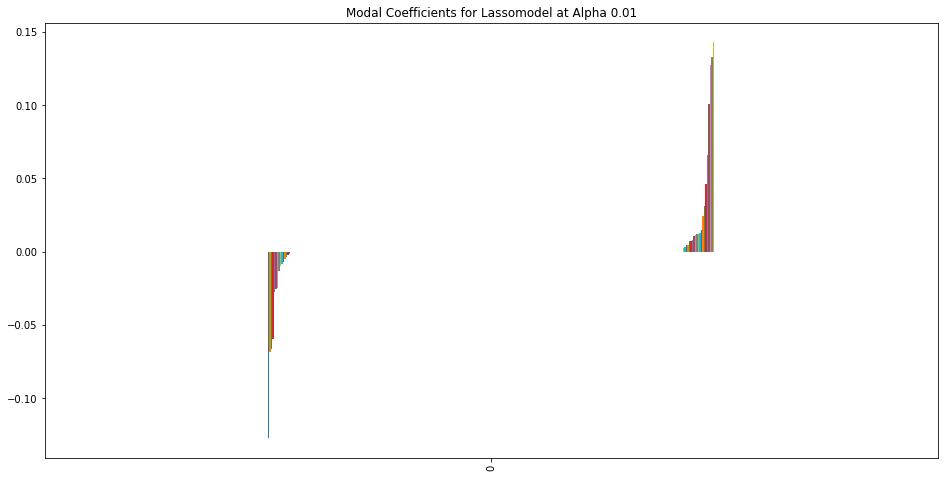

In [58]:
lasso_01_df = plot_coefs(lasso_01,X_train,name = "Lassomodel at Alpha 0.01", legend = False , return_df=True)

In [59]:
selected_columns = list(lasso_01_df.T.loc[lasso_01_df.T[0] != 0].index)
removed_columms = list(lasso_01_df.T.loc[lasso_01_df.T[0] == 0].index)

In [60]:
len(selected_columns) ,len(removed_columms)

(37, 262)

In [61]:
models_dict["poly_2_lasso_01"] = {
    "features" : selected_columns,
    "scaler" : scaler_2,
    "model" : lasso_01,
    "poly": 2
}

## Model Testing

In [62]:
from sklearn.model_selection import cross_validate

In [63]:
back_up = X_engineered_before_split.copy()

In [64]:
#Scaling the original Dataset
temp = list(models_dict.keys())[0]
orig_features = models_dict[temp]["features"]
temp_0_df = X_engineered_before_split[orig_features]
array = scaler.transform(temp_0_df)
temp_df = pd.DataFrame(array, columns = orig_features)
array_2 = poly_2.transform(temp_df)
array_2 = scaler_2.transform(array_2)
temp_df_2= pd.DataFrame(array_2, columns = poly_2.get_feature_names(orig_features))
temp_df_2.head()

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,renovated,zipcode,lat,long,yr_old,since_sold,boeing,microsoft,amazon,sqft_lot_log,sqft_lot15_log,sqft_basement_log,sqft_living_log,sqft_living15_log,sqft_above_log,bedrooms^2,bedrooms bathrooms,bedrooms floors,bedrooms waterfront,bedrooms view,bedrooms condition,bedrooms grade,bedrooms yr_built,bedrooms renovated,bedrooms zipcode,bedrooms lat,bedrooms long,bedrooms yr_old,bedrooms since_sold,bedrooms boeing,bedrooms microsoft,bedrooms amazon,bedrooms sqft_lot_log,bedrooms sqft_lot15_log,bedrooms sqft_basement_log,bedrooms sqft_living_log,bedrooms sqft_living15_log,bedrooms sqft_above_log,bathrooms^2,bathrooms floors,bathrooms waterfront,bathrooms view,bathrooms condition,bathrooms grade,bathrooms yr_built,bathrooms renovated,bathrooms zipcode,bathrooms lat,bathrooms long,bathrooms yr_old,bathrooms since_sold,bathrooms boeing,bathrooms microsoft,bathrooms amazon,bathrooms sqft_lot_log,bathrooms sqft_lot15_log,bathrooms sqft_basement_log,bathrooms sqft_living_log,bathrooms sqft_living15_log,bathrooms sqft_above_log,floors^2,floors waterfront,floors view,floors condition,floors grade,floors yr_built,floors renovated,floors zipcode,floors lat,floors long,floors yr_old,floors since_sold,floors boeing,floors microsoft,floors amazon,floors sqft_lot_log,floors sqft_lot15_log,floors sqft_basement_log,floors sqft_living_log,floors sqft_living15_log,floors sqft_above_log,waterfront^2,waterfront view,waterfront condition,waterfront grade,waterfront yr_built,waterfront renovated,waterfront zipcode,waterfront lat,waterfront long,waterfront yr_old,waterfront since_sold,waterfront boeing,waterfront microsoft,waterfront amazon,waterfront sqft_lot_log,waterfront sqft_lot15_log,waterfront sqft_basement_log,waterfront sqft_living_log,waterfront sqft_living15_log,waterfront sqft_above_log,view^2,view condition,view grade,view yr_built,view renovated,view zipcode,view lat,view long,view yr_old,view since_sold,view boeing,view microsoft,view amazon,view sqft_lot_log,view sqft_lot15_log,view sqft_basement_log,view sqft_living_log,view sqft_living15_log,view sqft_above_log,condition^2,condition grade,condition yr_built,condition renovated,condition zipcode,condition lat,condition long,condition yr_old,condition since_sold,condition boeing,condition microsoft,condition amazon,condition sqft_lot_log,condition sqft_lot15_log,condition sqft_basement_log,condition sqft_living_log,condition sqft_living15_log,condition sqft_above_log,grade^2,grade yr_built,grade renovated,grade zipcode,grade lat,grade long,grade yr_old,grade since_sold,grade boeing,grade microsoft,grade amazon,grade sqft_lot_log,grade sqft_lot15_log,grade sqft_basement_log,grade sqft_living_log,grade sqft_living15_log,grade sqft_above_log,yr_built^2,yr_built renovated,yr_built zipcode,yr_built lat,yr_built long,yr_built yr_old,yr_built since_sold,yr_built boeing,yr_built microsoft,yr_built amazon,yr_built sqft_lot_log,yr_built sqft_lot15_log,yr_built sqft_basement_log,yr_built sqft_living_log,yr_built sqft_living15_log,yr_built sqft_above_log,renovated^2,renovated zipcode,renovated lat,renovated long,renovated yr_old,renovated since_sold,renovated boeing,renovated microsoft,renovated amazon,renovated sqft_lot_log,renovated sqft_lot15_log,renovated sqft_basement_log,renovated sqft_living_log,renovated sqft_living15_log,renovated sqft_above_log,zipcode^2,zipcode lat,zipcode long,zipcode yr_old,zipcode since_sold,zipcode boeing,zipcode microsoft,zipcode amazon,zipcode sqft_lot_log,zipcode sqft_lot15_log,zipcode sqft_basement_log,zipcode sqft_living_log,zipcode sqft_living15_log,zipcode sqft_above_log,lat^2,lat long,lat yr_old,lat since_sold,lat boeing,lat microsoft,lat amazon,lat sqft_lot_log,lat sqft_lot15_log,lat sqft_basement_log,lat sqft_living_log,lat sqft_living15_log,lat sqft_above_log,long^2,long yr_old,long since_sold,long boeing,long microsoft,long amazon,long sqft_lot_log,long sqft_lot15_log,long sqft_basement_log,lo

In [65]:
def test_model(model,X,y,scaler,cv=3,get_raw = False):
    """description
    ------
    Input
    model:
    X:
    y:
    cv:
    get_raw:
    --------
    Output
    r_2:
    RMSE:
    RMSE_in_std:
    """
    scores = cross_validate(model, X, y, cv=cv,scoring=('r2', 'neg_mean_squared_error'),return_train_score=True)
    r_2 = scores["test_r2"].mean()
    RMSE = np.sqrt(-scores["train_neg_mean_squared_error"].mean())
    RMSE_in_std = RMSE/y.std()
    if get_raw:
        return scores
    else:
        return r_2, RMSE, RMSE_in_std

In [72]:
cv = 10
for model_name in models_dict.keys():
    model = models_dict[model_name]["model"]
    features = models_dict[model_name]["features"]
    X = temp_df_2[features]
    r_2, RMSE , RMSE_in_std = test_model(model,X,y,scaler,cv=3,get_raw = False)
    models_dict[model_name]["R_2"] = r_2
    models_dict[model_name]["RMSE"] = RMSE
    models_dict[model_name]["RMSE_in_std"] = RMSE_in_std
    print(f"Model: {model_name}, R_2: {r_2}, RMSE in std : {RMSE_in_std}")

Model: basemodel, R_2: 0.8127323048611156, RMSE in std : 0.4305585720127586
Model: poly_2_model, R_2: 0.891279857242813, RMSE in std : 0.31826644735297
Model: poly_2_p_removed_model, R_2: 0.8235896603819665, RMSE in std : 0.4133165671499295
Model: poly_2_f10_model, R_2: 0.7453223806247103, RMSE in std : 0.5030672154655756
Model: poly_2_RFE_model, R_2: 0.8937040158741051, RMSE in std : 0.3186722377168109
Model: poly_2_lasso_01, R_2: 0.8462259251439536, RMSE in std : 0.38983319792131804


## Results
And the Winner is:
### poly_2_RFE_model

In [71]:
models_dict["poly_2_RFE_model"]["features"]

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'yr_built', 'renovated', 'zipcode',
       ...
       'sqft_basement_log^2', 'sqft_basement_log sqft_living_log',
       'sqft_basement_log sqft_living15_log',
       'sqft_basement_log sqft_above_log', 'sqft_living_log^2',
       'sqft_living_log sqft_living15_log', 'sqft_living_log sqft_above_log',
       'sqft_living15_log^2', 'sqft_living15_log sqft_above_log',
       'sqft_above_log^2'],
      dtype='object', length=220)